In [29]:
import pandas as pd
import numpy as np 

results = pd.read_csv("..\\Data\\results_norm.csv")
target = pd.read_csv("..\\Data\\fin_data.csv")
results = results.T
results = results.drop(["Unnamed: 0"])
# results = results.iloc[1:,:]

target.index = target["Date"]

target = target.drop(["Date"], axis=1)
target = target.pct_change()
target = pd.DataFrame(np.log1p(target))
target = target.iloc[1:,:]
target = target.iloc[1000:, 0]

results.index = target.index
results = results
target = target
display(results)
display(target)

,0,1,2,3,4,5,6,7,8
Date,,,,,,,,,
2006-11-02,-0.005763,-0.005763,-0.005515,-0.005515,0.001202,0.001202,-0.006144,-0.006144,0.002141
2006-11-03,-0.001623,-0.001623,-0.001189,-0.001189,-0.009202,-0.009202,-0.000932,-0.000932,0.001089
2006-11-06,-0.002508,-0.002508,-0.002426,-0.002426,0.019820,0.019820,-0.002034,-0.002034,-0.006268
2006-11-07,0.007913,0.007913,0.010455,0.010455,-0.000473,-0.000473,0.010587,0.010587,0.001404
2006-11-08,0.003084,0.003084,0.002235,0.002235,-0.003927,-0.003927,0.003742,0.003742,0.002009
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.005205,-0.011861,0.006776,0.003857,0.012473,0.013039,0.003988,0.004100,-0.006162
2022-12-27,0.000158,-0.000316,-0.002422,0.003103,0.003013,0.003008,0.000555,0.000781,-0.004276
2022-12-28,-0.005764,-0.003574,-0.009370,-0.003284,-0.002370,-0.002507,-0.005114,-0.002643,0.003062


Date
2006-11-02   -0.000344
2006-11-03   -0.002226
2006-11-06    0.011283
2006-11-07    0.002215
2006-11-08    0.002081
                ...   
2022-12-26    0.000000
2022-12-27   -0.004058
2022-12-28   -0.012093
2022-12-29    0.017311
2022-12-30   -0.002544
Name: 0, Length: 4217, dtype: float64

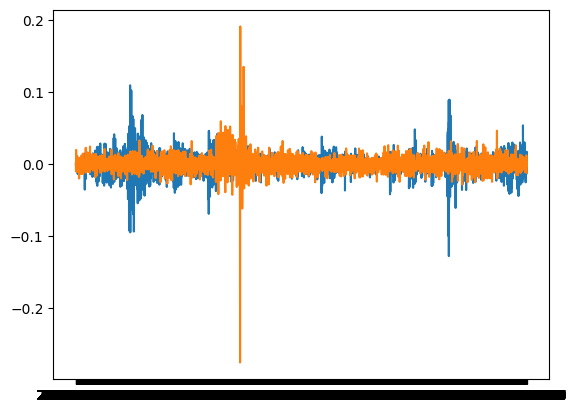

In [30]:
import matplotlib.pyplot as plt
plt.plot(target)
plt.plot(results[4])
plt.show()

In [31]:
from dieboldmariano import dm_test
from ARXT import hit_rate
from sklearn.metrics import mean_squared_error
from math import sqrt

def res(target, forecast):
    rmse = sqrt(mean_squared_error(target, forecast))
    hr = hit_rate(target, forecast)
    return(rmse, hr)

In [36]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame that includes a 'Date' column and a 'Performance_Metric' column
# Your list of changepoints
changepoints = [
    "2008-09-19",
    "2010-05-11",
    "2011-08-10",
    "2015-08-27",
    "2018-12-27",
    "2020-03-03",
    "2022-11-11",
]

def summary_splits(df, changepoints):
    # Convert changepoints to datetime
    changepoints = pd.to_datetime(changepoints)

    # Sort the DataFrame by date to ensure correct split calculations
    # df.sort_values(by='Date', inplace=True)

    # Convert the 'Date' column to datetime if it's not already
    df.index = pd.to_datetime(df.index)

    # Initialize the start date for the first split
    start_date = df.index.min()

    # Dictionary to hold the summary statistics for each split
    summary_statistics = {}

    # Iterate over the changepoints to create splits and calculate summary statistics
    for i, cp in enumerate(changepoints, start=1):
        # Create a mask for the current split
        mask = df[(df.index >= start_date) & (df.index < cp)]
        # Calculate summary statistics for the current split
        summary_statistics[f'Split {i}'] = mask.describe()
        # Update the start date for the next split
        start_date = cp

    # The last split goes from the last changepoint to the latest date
    mask = df[(df.index >= start_date)]
    summary_statistics[f'Split {i+1}'] = mask.describe()

    # Convert summary statistics dictionary to a DataFrame for better display and analysis
    summary_stats_df = pd.DataFrame(summary_statistics)
    return summary_stats_df
# Print or output the summary statistics DataFrame
df = target
# df_diff = df.diff()
df_norm=target

# summary_stats_diff = summary_splits(df_diff,changepoints)
summary_stats_norm = summary_splits(df_norm,changepoints)

display(summary_stats_norm)


,Split 1,Split 2,Split 3,Split 4,Split 5,Split 6,Split 7,Split 8
count,491.000000,427.000000,326.000000,1056.000000,870.000000,308.000000,703.000000,36.000000
mean,-0.000256,-0.000093,0.000034,0.000477,0.000276,0.000730,0.000351,-0.000833
std,0.011622,0.022432,0.011336,0.009201,0.008365,0.008815,0.016161,0.011267
min,-0.048288,-0.094695,-0.068958,-0.045619,-0.041843,-0.045168,-0.127652,-0.025237
25%,-0.005221,-0.008898,-0.004161,-0.003697,-0.002450,-0.002655,-0.006517,-0.008459
50%,0.000533,0.001128,0.000201,0.000307,0.000209,0.000882,0.000551,-0.001394
75%,0.005688,0.008915,0.005372,0.005064,0.004071,0.005761,0.008193,0.006239
max,0.042429,0.109572,0.046317,0.045251,0.048403,0.045011,0.089683,0.030479


Normalised Data

In [37]:
# rmse_sample = (sqrt(mean_squared_error(d_val_cumsum, valid_prediction_cumsum)))

res_norm_all = np.zeros((2,results.shape[1]))
dm_res_norm_all = np.zeros((2,results.shape[1]-1))

for i, forecast in enumerate(results):
        rmse, hr = res(target, results.iloc[:,i])
        res_norm_all[0,i] = rmse
        res_norm_all[1,i] = hr
        if i != 8:
            dm_stat, p_value = dm_test(target, results.iloc[:,i], results.iloc[:,8])

            # Store results
            dm_res_norm_all[0,i] = dm_stat
            dm_res_norm_all[1,i] = p_value
    
display(pd.DataFrame(res_norm_all).round(2))
display(pd.DataFrame(dm_res_norm_all).round(2))

,0,1,2,3,4,5,6,7,8
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
1,0.34,0.34,0.33,0.33,0.50,0.50,0.33,0.33,0.47


,0,1,2,3,4,5,6,7
0,5.85,7.3,5.57,6.24,0.87,0.88,5.95,5.2
1,0.00,0.0,0.00,0.00,0.39,0.38,0.00,0.0


In [38]:
# can also import from changepoints output file

changepoints = [
    "2008-09-19",
    "2010-05-11",
    "2011-08-10",
    "2015-08-27",
    "2018-12-27",
    "2020-03-03",
    "2022-11-11",
]

lengths = summary_stats_norm.loc["count",:]
lengths = pd.concat([pd.Series([0]), lengths])
lenghts = lengths.cumsum()
lenghts.index = range(len(lenghts))

In [40]:

res_norm = np.zeros(((len(lengths)-1)*2,results.shape[1]))
dm_res_norm = np.zeros(((len(lengths)-1)*2,results.shape[1]-1))

for i, forecast in enumerate(results):
    for j in range(len(lengths)-1):
        rmse, hr = res(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i])
        res_norm[2*j,i] = rmse
        res_norm[2*j+1,i] = hr
        if i != 8:
            dm_stat, p_value = dm_test(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i], results.iloc[int(lenghts[j]):int(lenghts[j+1]),8])

            # Store results
            dm_res_norm[j*2,i] = dm_stat
            dm_res_norm[j*2+1,i] = p_value
    
display(pd.DataFrame(res_norm).round(2))
display(pd.DataFrame(dm_res_norm).round(2))

,0,1,2,3,4,5,6,7,8
0,0.02,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01
1,0.37,0.37,0.32,0.32,0.49,0.49,0.32,0.32,0.52
2,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.03
3,0.34,0.34,0.33,0.32,0.50,0.50,0.35,0.32,0.46
4,0.02,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01
5,0.33,0.33,0.35,0.33,0.56,0.56,0.33,0.33,0.45
6,0.01,0.01,0.01,0.01,0.02,0.02,0.01,0.01,0.01
7,0.34,0.33,0.33,0.34,0.47,0.47,0.32,0.33,0.49
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,0.33,0.33,0.34,0.33,0.52,0.52,0.33,0.32,0.49


,0,1,2,3,4,5,6,7
0,5.68,5.68,5.32,5.32,-1.60,-1.60,4.61,4.61
1,0.00,0.00,0.00,0.00,0.11,0.11,0.00,0.00
2,3.63,3.61,3.26,3.76,-2.50,-2.50,3.71,3.13
3,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00
4,2.57,3.07,3.04,3.18,0.29,0.57,3.02,2.47
5,0.01,0.00,0.00,0.00,0.77,0.57,0.00,0.01
6,2.71,3.98,2.97,2.99,2.48,2.54,3.31,2.17
7,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.03
8,3.13,4.85,2.97,3.79,0.16,0.13,3.49,3.36
9,0.00,0.00,0.00,0.00,0.87,0.90,0.00,0.00


In [41]:
res_norm = pd.DataFrame(res_norm, columns=results.columns)
dm_res_norm = pd.DataFrame(dm_res_norm)
res_norm_all = pd.DataFrame(res_norm_all, columns=results.columns)
dm_res_norm_all = pd.DataFrame(dm_res_norm_all)

res_norm.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained","ARX_retrained", "ARX", "AR"]
res_norm = res_norm.round(2)
res_norm.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_norm))]
res_norm.to_csv("split_results_norm.csv")

res_norm_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained","ARX_retrained", "ARX", "AR"]
res_norm_all = res_norm_all.round(2)
res_norm_all.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_norm_all))]
res_norm_all.to_csv("split_results_norm_all.csv")

dm_res_norm.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained","ARX_retrained", "ARX"]
dm_res_norm = dm_res_norm.round(2)
dm_res_norm.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_norm))]
dm_res_norm.to_csv("split_results_norm_db.csv")

dm_res_norm_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained","ARX_retrained", "ARX"]
dm_res_norm_all = dm_res_norm_all.round(2)
dm_res_norm_all.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_norm_all))]
dm_res_norm_all.to_csv("split_results_norm_db_all.csv")

Differenced

In [11]:
results = pd.read_csv("..\\Data\\results_diff.csv")
target = pd.read_csv("..\\Data\\fin_data.csv")
results = results.T
results = results.drop(["Unnamed: 0"])
results = results/100

target.index = target["Date"]

target = target.drop(["Date"], axis=1)
target = target.pct_change()
target = pd.DataFrame(np.log1p(target))
target = target.diff()
target = target.iloc[2:,:]
target = target.iloc[1000:, 0]
results.index = target.index
display(results)
display(target)

,0,1,2,3,4,5,6,7,8
Date,,,,,,,,,
2006-11-03,0.005213,0.005213,0.005634,0.005634,-0.000097,-0.000097,0.005813,0.005813,-0.003633
2006-11-06,-0.001376,-0.001376,-0.002366,-0.002366,0.000263,0.000263,-0.002199,-0.002199,-0.005475
2006-11-07,0.013079,0.013079,0.013524,0.013524,-0.000183,-0.000183,0.012554,0.012554,-0.002958
2006-11-08,-0.007276,-0.007276,-0.007438,-0.007438,-0.000023,-0.000023,-0.007536,-0.007536,0.006989
2006-11-09,0.009843,0.009843,-0.000217,-0.000217,0.000016,0.000016,-0.000328,-0.000328,0.006755
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.019580,0.017850,0.014659,0.019214,0.000121,0.000141,0.017732,0.017488,0.005290
2022-12-27,-0.005242,-0.004699,-0.003479,-0.004431,-0.000094,-0.000096,-0.005130,-0.005559,0.004293
2022-12-28,-0.006125,-0.004125,-0.004383,-0.000574,-0.000050,-0.000052,-0.004881,-0.002958,0.010835


Date
2006-11-03   -0.001882
2006-11-06    0.013508
2006-11-07   -0.009067
2006-11-08   -0.000135
2006-11-09   -0.007428
                ...   
2022-12-26   -0.005851
2022-12-27   -0.004058
2022-12-28   -0.008036
2022-12-29    0.029404
2022-12-30   -0.019855
Name: 0, Length: 4216, dtype: float64

In [12]:

res_diff_all = np.zeros((2,results.shape[1]))
dm_res_diff_all = np.zeros((2,results.shape[1]-1))

for i, forecast in enumerate(results):
        rmse, hr = res(target, results.iloc[:,i])
        res_diff_all[0,i] = rmse
        res_diff_all[1,i] = hr
        if i != 8:
            dm_stat, p_value = dm_test(target, results.iloc[:,i], results.iloc[:,8])

            # Store results
            dm_res_diff_all[0,i] = dm_stat
            dm_res_diff_all[1,i] = p_value
    
    
display(pd.DataFrame(res_diff_all).round(2))
display(pd.DataFrame(dm_res_diff_all).round(2))

,0,1,2,3,4,5,6,7,8
0,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.02
1,0.27,0.27,0.26,0.27,0.51,0.51,0.26,0.26,0.68


,0,1,2,3,4,5,6,7
0,11.04,11.02,10.59,10.68,0.83,0.83,10.65,10.49
1,0.00,0.00,0.00,0.00,0.40,0.40,0.00,0.00


In [15]:
res_diff = np.zeros(((len(lengths)-1)*2,results.shape[1]))
dm_res_diff = np.zeros(((len(lengths)-1)*2,results.shape[1]-1))

for i, forecast in enumerate(results):
    for j in range(len(lengths)-1):
        rmse, hr = res(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i])
        res_diff[2*j,i] = rmse
        res_diff[2*j+1,i] = hr
        if i != 8:
            dm_stat, p_value = dm_test(target.iloc[int(lenghts[j]):int(lenghts[j+1])], results.iloc[int(lenghts[j]):int(lenghts[j+1]),i], results.iloc[int(lenghts[j]):int(lenghts[j+1]),8])

            # Store results
            dm_res_diff[j*2,i] = dm_stat
            dm_res_diff[j*2+1,i] = p_value
    
display(pd.DataFrame(res_diff).round(2))
display(pd.DataFrame(dm_res_diff).round(2))

,0,1,2,3,4,5,6,7,8
0,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.02
1,0.28,0.28,0.28,0.28,0.51,0.51,0.28,0.28,0.71
2,0.06,0.06,0.06,0.06,0.03,0.03,0.06,0.06,0.03
3,0.26,0.26,0.26,0.26,0.52,0.52,0.26,0.26,0.71
4,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.02
5,0.26,0.26,0.25,0.26,0.56,0.53,0.26,0.26,0.69
6,0.02,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01
7,0.27,0.27,0.26,0.26,0.49,0.48,0.26,0.26,0.67
8,0.02,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01
9,0.26,0.27,0.25,0.25,0.52,0.52,0.25,0.25,0.67


,0,1,2,3,4,5,6,7
0,8.44,8.44,8.45,8.45,0.55,0.55,8.18,8.13
1,0.00,0.00,0.00,0.00,0.59,0.59,0.00,0.00
2,6.40,6.35,6.53,6.33,1.07,1.07,6.37,6.24
3,0.00,0.00,0.00,0.00,0.29,0.29,0.00,0.00
4,4.07,4.02,4.23,4.11,1.21,1.21,4.24,4.09
5,0.00,0.00,0.00,0.00,0.23,0.23,0.00,0.00
6,7.41,7.35,7.45,7.52,-2.11,-2.11,7.73,7.31
7,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00
8,8.86,8.69,8.76,8.92,-1.69,-1.68,8.77,8.75
9,0.00,0.00,0.00,0.00,0.09,0.09,0.00,0.00


In [16]:
res_diff = pd.DataFrame(res_diff, columns=results.columns)
dm_res_diff = pd.DataFrame(dm_res_diff)
res_diff_all = pd.DataFrame(res_diff_all, columns=results.columns)
dm_res_diff_all = pd.DataFrame(dm_res_diff_all)

res_diff.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained","ART_retuned", "ART_retrained", "ARX_retrained", "ARX", "AR"]
res_diff = res_diff.round(2)
res_diff.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_diff))]
res_diff.to_csv("split_results_diff.csv")

res_diff_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained", "ART_retuned", "ART_retrained","ARX_retrained", "ARX", "AR"]
res_diff_all = res_diff_all.round(2)
res_diff_all.index = [f"{i//2}_{'rmse' if i % 2 == 0 else 'hr'}" for i in range(len(res_diff_all))]
res_diff_all.to_csv("split_results_diff_all.csv")

dm_res_diff.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained","ART_retuned", "ART_retrained", "ARX_retrained", "ARX"]
dm_res_diff = dm_res_diff.round(2)
dm_res_diff.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff))]
dm_res_diff.to_csv("split_results_diff_db.csv")

dm_res_diff_all.columns = ["ARXT_exog_retuned", "ARXT_exog_retrained", "ARXT_target_retuned", "ARXT_target_retrained","ART_retuned", "ART_retrained", "ARX_retrained", "ARX"]
dm_res_diff_all = dm_res_diff_all.round(2)
dm_res_diff_all.index = [f"{i//2}_{'test_stat' if i % 2 == 0 else 'p_val'}" for i in range(len(dm_res_diff_all))]
dm_res_diff_all.to_csv("split_results_diff_db_all.csv")